In [82]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [83]:
df=pd.read_csv('StudentsPerformance.csv')

In [84]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [85]:
df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [86]:
df['Final_score']=(np.round((df['math score']+df['writing score']+df['reading score'])/3))
df['Final_score']=df['Final_score'].apply(int)

In [87]:
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Final_score
0,female,group B,bachelor's degree,standard,none,72,72,74,73
1,female,group C,some college,standard,completed,69,90,88,82
2,female,group B,master's degree,standard,none,90,95,93,93
3,male,group A,associate's degree,free/reduced,none,47,57,44,49
4,male,group C,some college,standard,none,76,78,75,76
...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,94
996,male,group C,high school,free/reduced,none,62,55,55,57
997,female,group C,high school,free/reduced,completed,59,71,65,65
998,female,group D,some college,standard,completed,68,78,77,74


In [88]:
df=df.drop(['math score','reading score','writing score'],axis=1)
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,Final_score
0,female,group B,bachelor's degree,standard,none,73
1,female,group C,some college,standard,completed,82
2,female,group B,master's degree,standard,none,93
3,male,group A,associate's degree,free/reduced,none,49
4,male,group C,some college,standard,none,76
...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,94
996,male,group C,high school,free/reduced,none,57
997,female,group C,high school,free/reduced,completed,65
998,female,group D,some college,standard,completed,74


In [89]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
Final_score                    0
dtype: int64

In [90]:
ot=df.select_dtypes(include='object')
odf=pd.get_dummies(ot,drop_first=True)
odf

,gender_male,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,parental level of education_some high school,lunch_standard,test preparation course_none
0,False,True,False,False,False,True,False,False,False,False,True,True
1,False,False,True,False,False,False,False,False,True,False,True,False
2,False,True,False,False,False,False,False,True,False,False,True,True
3,True,False,False,False,False,False,False,False,False,False,False,True
4,True,False,True,False,False,False,False,False,True,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...
995,False,False,False,False,True,False,False,True,False,False,True,False
996,True,False,True,False,False,False,True,False,False,False,False,True
997,False,False,True,False,False,False,True,False,False,False,False,False
998,False,False,False,True,False,False,False,False,True,False,True,False


In [91]:
nodf=df.select_dtypes(exclude='object')
nodf

,Final_score
0,73
1,82
2,93
3,49
4,76
...,...
995,94
996,57
997,65
998,74


In [92]:
ndf=pd.concat([odf,nodf],axis=1)

In [ ]:
ndf.to_csv('CleanedStudentperformance1.csv')

In [124]:
df=pd.read_csv('CleanedStudentperformance1.csv')
df.corr()['Final_score'].sort_values()

test preparation course_none                    -0.257194
parental level of education_high school         -0.160740
gender_male                                     -0.131482
parental level of education_some high school    -0.088116
race/ethnicity_group B                          -0.077410
race/ethnicity_group C                          -0.030724
parental level of education_some college         0.025969
Unnamed: 0                                       0.050156
race/ethnicity_group D                           0.059260
parental level of education_master's degree      0.102158
parental level of education_bachelor's degree    0.107467
race/ethnicity_group E                           0.140207
lunch_standard                                   0.289983
Final_score                                      1.000000
Name: Final_score, dtype: float64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 [Text(0, 0, 'Unnamed: 0'),
  Text(1, 0, 'gender_male'),
  Text(2, 0, 'race/ethnicity_group B'),
  Text(3, 0, 'race/ethnicity_group C'),
  Text(4, 0, 'race/ethnicity_group D'),
  Text(5, 0, 'race/ethnicity_group E'),
  Text(6, 0, "parental level of education_bachelor's degree"),
  Text(7, 0, 'parental level of education_high school'),
  Text(8, 0, "parental level of education_master's degree"),
  Text(9, 0, 'parental level of education_some college'),
  Text(10, 0, 'parental level of education_some high school'),
  Text(11, 0, 'lunch_standard'),
  Text(12, 0, 'test preparation course_none'),
  Text(13, 0, 'Final_score')])

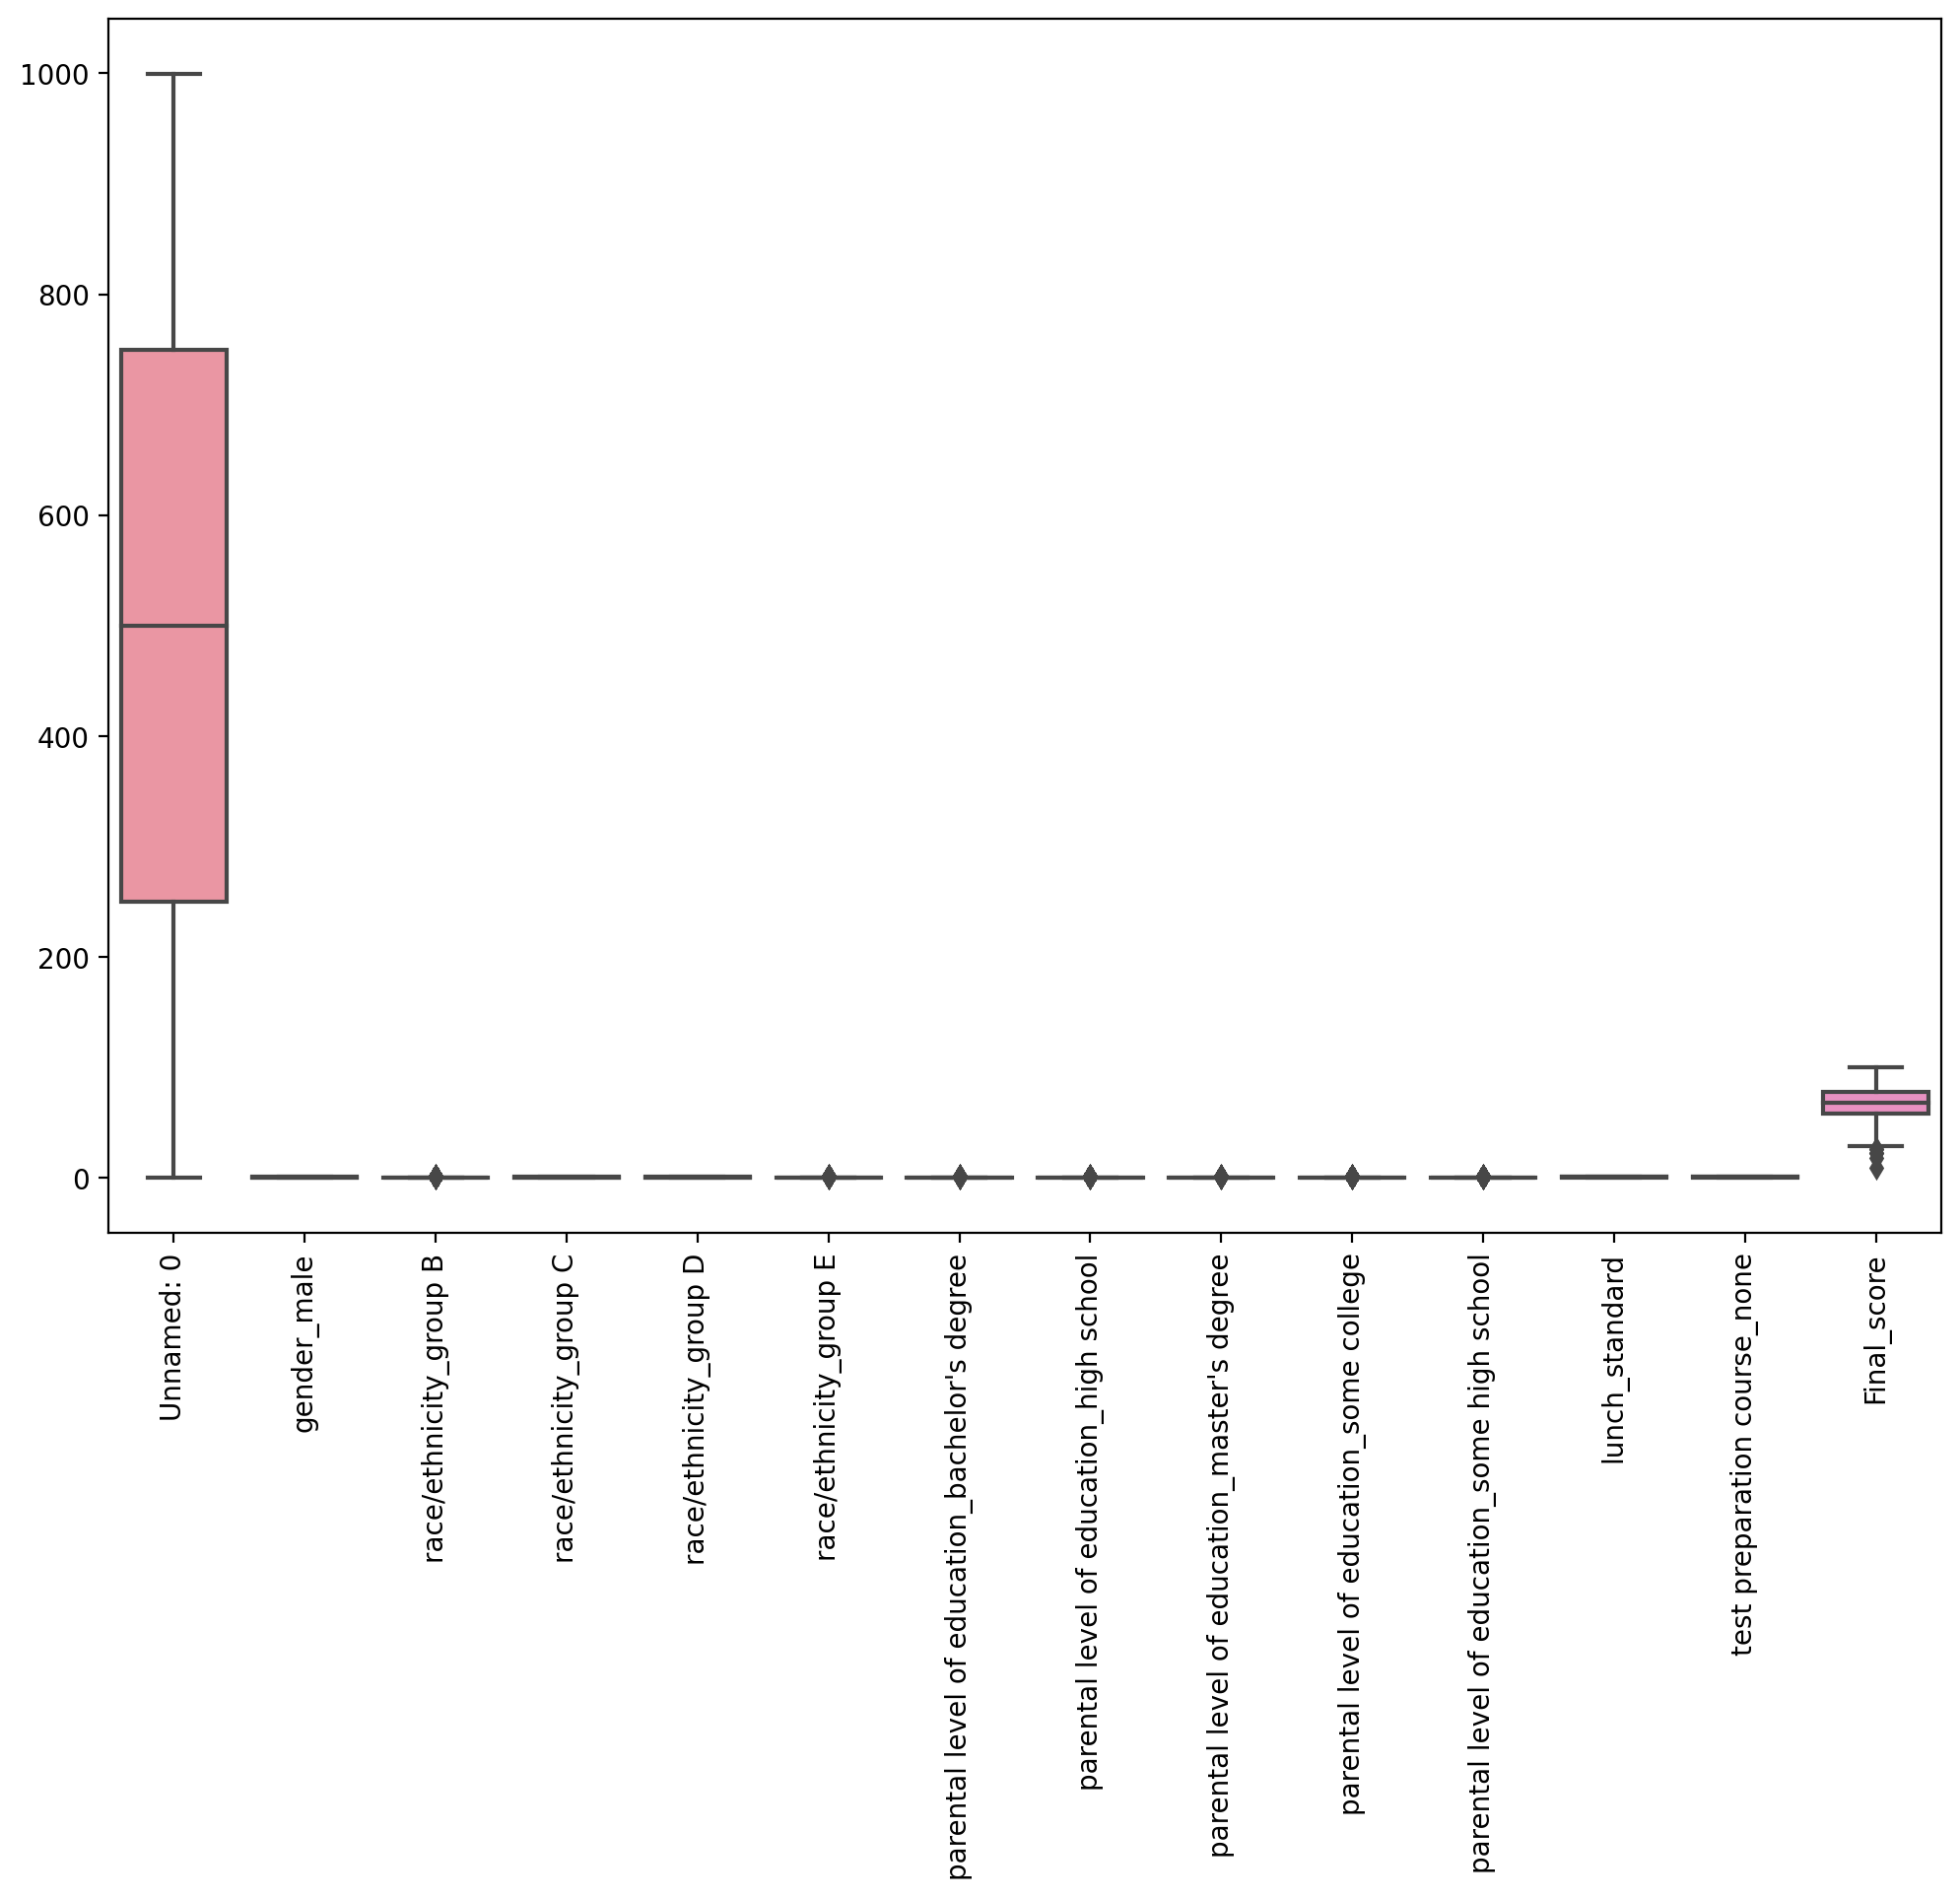

In [95]:
plt.figure(figsize=(12,8),dpi=200)
sns.boxplot(data=df)
plt.xticks(rotation=90)

In [96]:
q3,q1=np.percentile(df,[25,75])
IQR=q3-q1
IQR
ll=q1-(1.5*IQR)
ul=q3-(1.5*IQR)
df.set_index('Unnamed: 0')

,gender_male,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,parental level of education_some high school,lunch_standard,test preparation course_none,Final_score
Unnamed: 0,,,,,,,,,,,,,
0,False,True,False,False,False,True,False,False,False,False,True,True,73
1,False,False,True,False,False,False,False,False,True,False,True,False,82
2,False,True,False,False,False,False,False,True,False,False,True,True,93
3,True,False,False,False,False,False,False,False,False,False,False,True,49
4,True,False,True,False,False,False,False,False,True,False,True,True,76
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,False,False,False,False,True,False,False,True,False,False,True,False,94
996,True,False,True,False,False,False,True,False,False,False,False,True,57
997,False,False,True,False,False,False,True,False,False,False,False,False,65


In [ ]:
x=df.drop('Final_score',axis=1)
y=df['Final_score']
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [98]:
from sklearn.linear_model import LinearRegression
linear_model=LinearRegression()
linear_model.fit(X_train,y_train)
linear_model_xpred=linear_model.predict(X_train)
linear_model_pred=linear_model.predict(X_test)

Text(0.5, 1.0, 'RESIDUAL PLOT')

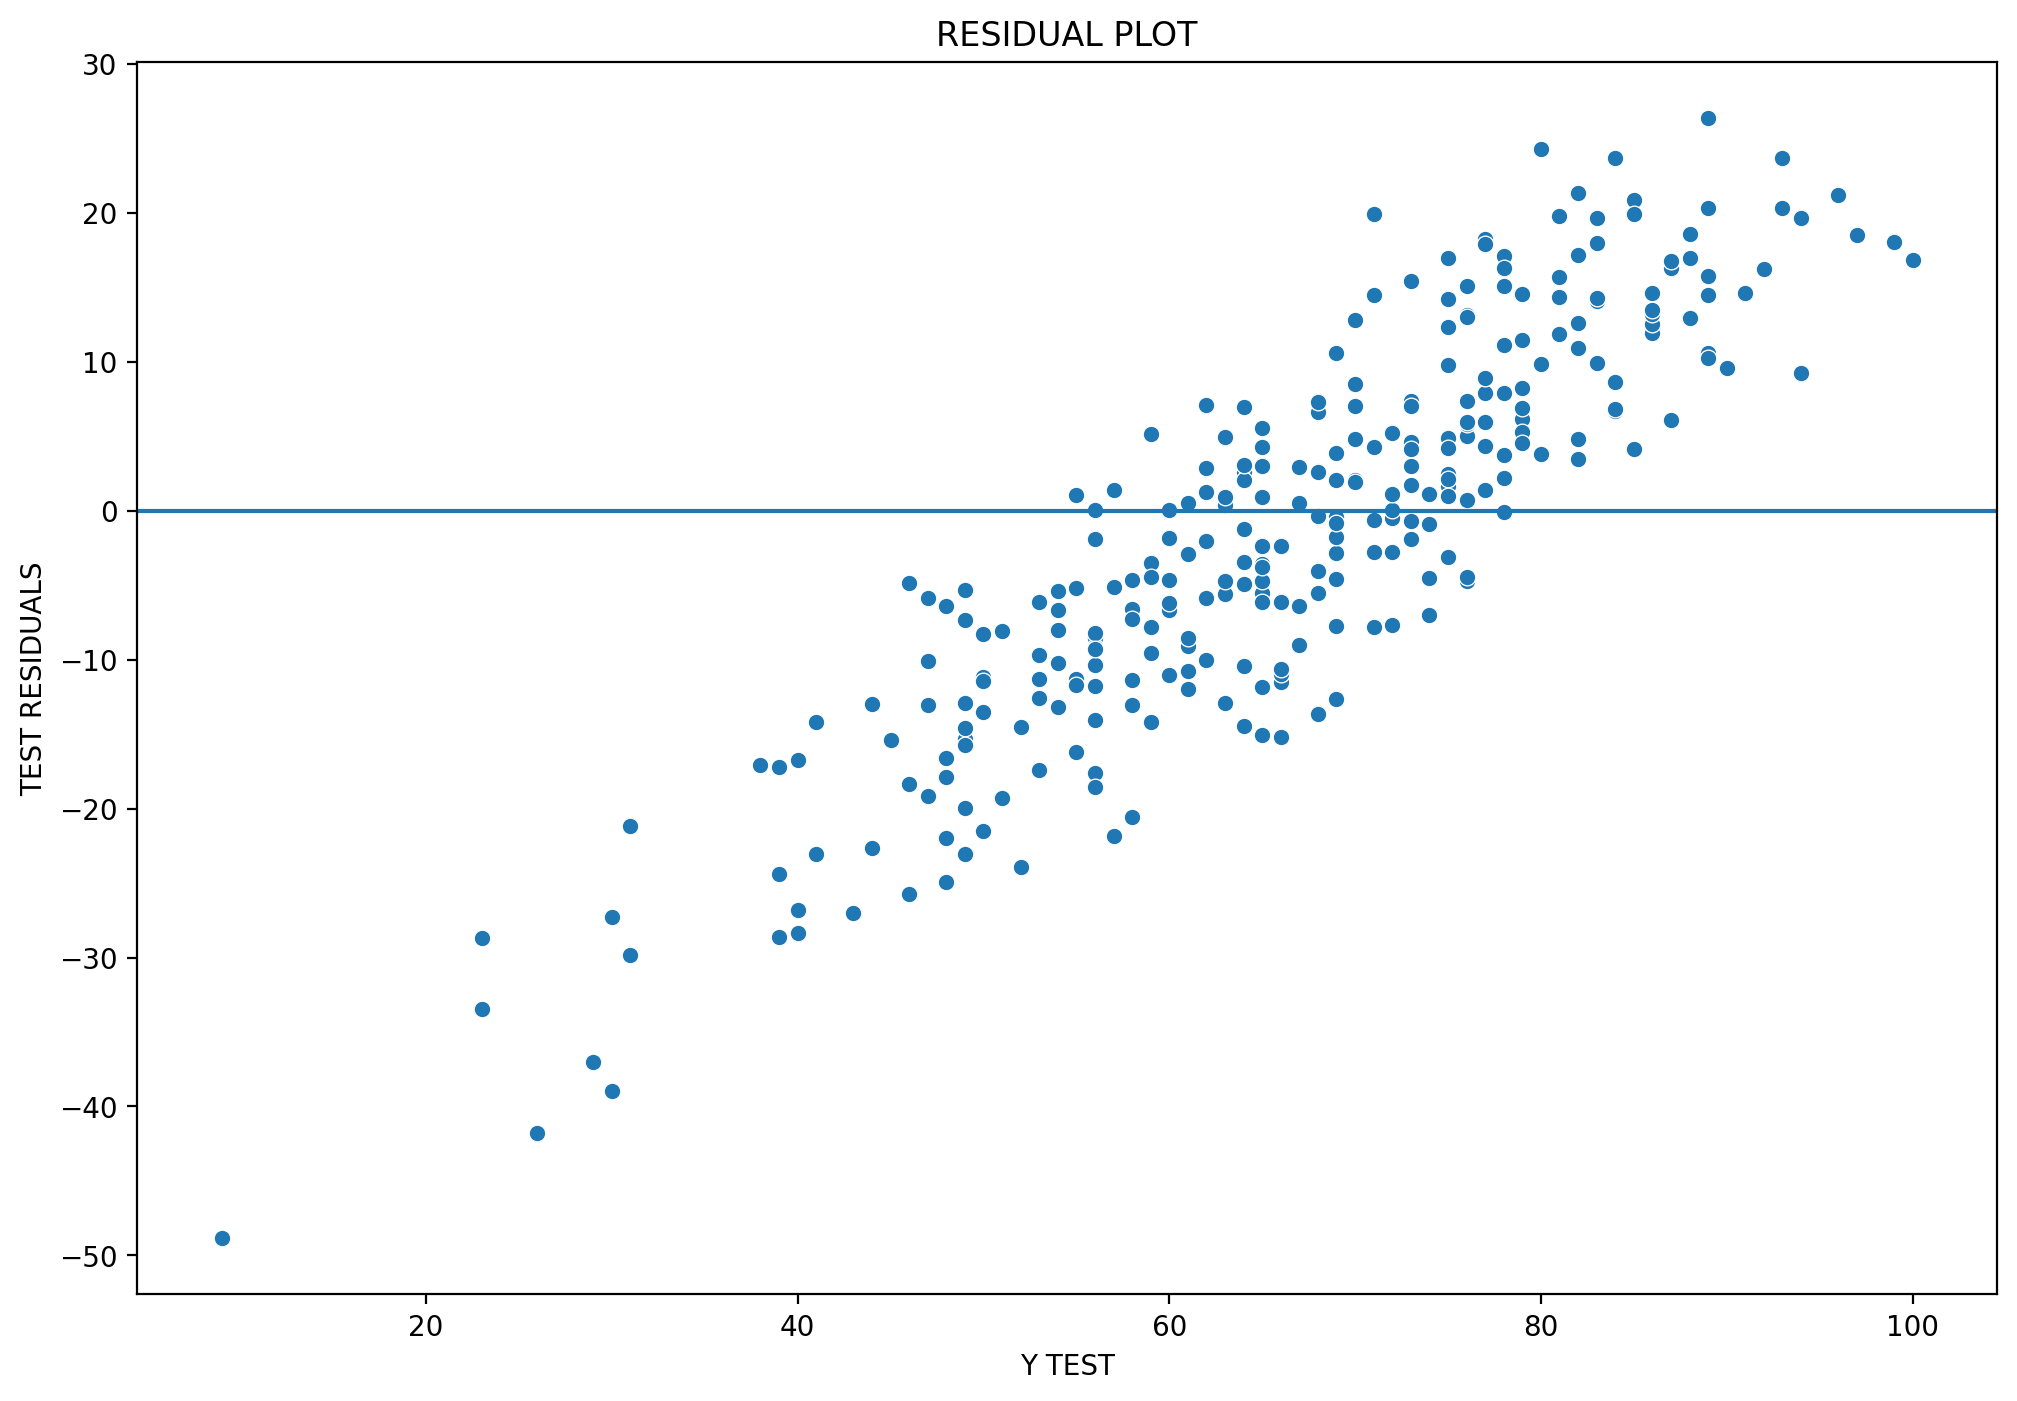

In [99]:
test_res=y_test-linear_model_pred
plt.figure(figsize=(12,8),dpi=200)
sns.scatterplot(x=y_test,y=test_res)
plt.xlabel('Y TEST')
plt.ylabel('TEST RESIDUALS')
plt.axhline(y=0)
plt.title('RESIDUAL PLOT')

In [100]:
from sklearn.metrics import mean_squared_error
rmse=np.sqrt(mean_squared_error(y_test,linear_model_pred))
rmse

13.225276510347022

In [ ]:
final_model=LinearRegression()
final_model.fit(x,y)
final_model_pred=final_model.predict(x)
rmse=np.sqrt(mean_squared_error(y,final_model_pred))
rmse

12.378983490218632

In [119]:
from joblib import dump,load
dump(final_model,'StudentsPerformancefinalmodel.csv')

['StudentsPerformancefinalmodel.csv']

In [128]:
loaded_model=load('StudentsPerformancefinalmodel.csv')
ndf

,gender_male,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,parental level of education_some high school,lunch_standard,test preparation course_none,Final_score
0,False,True,False,False,False,True,False,False,False,False,True,True,73
1,False,False,True,False,False,False,False,False,True,False,True,False,82
2,False,True,False,False,False,False,False,True,False,False,True,True,93
3,True,False,False,False,False,False,False,False,False,False,False,True,49
4,True,False,True,False,False,False,False,False,True,False,True,True,76
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,False,False,False,False,True,False,False,True,False,False,True,False,94
996,True,False,True,False,False,False,True,False,False,False,False,True,57
997,False,False,True,False,False,False,True,False,False,False,False,False,65
998,False,False,False,True,False,False,False,False,True,False,True,False,74


In [126]:
loaded_model.coef_

array([ 2.71818870e-03, -3.66198888e+00,  1.72227213e+00,  2.49097290e+00,
        5.20409923e+00,  6.90911760e+00,  2.50416266e+00, -5.33510503e+00,
        4.07636813e+00, -9.98604030e-01, -4.64945516e+00,  8.82997134e+00,
       -7.60717564e+00])

In [129]:
info=[[0,1,0,0,0,1,1,1,1,1,1,1,1]]

In [131]:
prdicted_score=loaded_model.predict(info)

c:\Users\rayan\Downloads\d\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [132]:
prdicted_score

array([65.54012776])